In [116]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [117]:
df = pd.read_csv("cleaned_canada.csv")
df.head()

,City,Province,Latitude,Longitude,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,...,Exterior,Fireplace,Heating,Flooring,Roof,Waterfront,Sewer,Pool,Garden,Balcony
0,Revelstoke,BC,50.976585,-118.173149,839000.0,3.0,2.0,0.00,Condo,891.0,...,NaN,No,heat pump,carpet,NaN,No,municipal,No,No,No
1,Boswell,BC,49.471870,-116.770195,1150000.0,3.0,2.0,0.32,Single Family,1881.0,...,NaN,No,heat pump,NaN,NaN,No,septic,No,No,No
2,West Kelowna,BC,49.825230,-119.603253,149000.0,2.0,1.0,0.00,Single Family,912.0,...,Metal,No,NaN,laminate,tar,No,municipal,No,No,No
3,Kelowna,BC,49.821860,-119.480143,1298000.0,5.0,4.0,0.69,Single Family,4374.0,...,NaN,Yes,forced air,NaN,NaN,No,municipal,No,No,No
4,Maple Ridge,BC,49.221673,-122.596637,759900.0,3.0,2.0,0.00,Condo,1254.0,...,NaN,No,radiant,NaN,NaN,No,none,No,No,No


In [118]:
df.shape

(44896, 23)

In [119]:
df.isna().sum()

City                  0
Province              0
Latitude              0
Longitude             0
Price                 0
Bedrooms              0
Bathrooms             0
Acreage               0
Property Type         0
Square Footage        0
Garage                0
Parking               0
Basement          29934
Exterior          27457
Fireplace             0
Heating            6654
Flooring          29680
Roof              34844
Waterfront            0
Sewer                 0
Pool                  0
Garden                0
Balcony               0
dtype: int64

In [120]:
df1 = df.drop(["Basement", "Exterior", "Flooring", "Roof", "Latitude", "Longitude"], axis = 1).dropna()
df1.isna().sum()

City              0
Province          0
Price             0
Bedrooms          0
Bathrooms         0
Acreage           0
Property Type     0
Square Footage    0
Garage            0
Parking           0
Fireplace         0
Heating           0
Waterfront        0
Sewer             0
Pool              0
Garden            0
Balcony           0
dtype: int64

In [121]:
df1.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony
0,Revelstoke,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No
1,Boswell,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes


In [122]:
df2 = df1.copy()
df2['price_per_sqft'] = df2["Price"] / df["Square Footage"]
df2.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,Revelstoke,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No,941.638608
1,Boswell,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No,611.376927
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No,296.753544
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No,605.980861
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes,366.292135


In [123]:
location_stats = df2["City"].value_counts(ascending=False)
print(location_stats)

City
Vancouver     3375
Surrey        2940
Calgary       1949
Richmond      1241
Kelowna       1177
              ... 
Irricana         1
Riondel          1
Wynndel          1
Colinton         1
Sandy Lake       1
Name: count, Length: 2300, dtype: int64


In [124]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [125]:
df2.City = df2.City.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df2.head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,other,BC,839000.0,3.0,2.0,0.00,Condo,891.0,Yes,Yes,No,heat pump,No,municipal,No,No,No,941.638608
1,other,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,Yes,Yes,No,heat pump,No,septic,No,No,No,611.376927
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,Yes,No,Yes,forced air,No,municipal,No,No,No,296.753544
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,Yes,Yes,No,radiant,No,none,No,No,No,605.980861
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,Yes,No,Yes,forced air,No,none,No,Yes,Yes,366.292135


In [126]:
df3 = df2.copy()
cols = ["Garage", "Parking", "Fireplace", "Waterfront", "Pool", "Garden", "Balcony"]
df3[cols] = df3[cols].replace({"Yes": 1, "No": 0})
df3.head()

C:\Users\tomin\AppData\Local\Temp\ipykernel_10708\746168800.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3[cols] = df3[cols].replace({"Yes": 1, "No": 0})


,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,other,BC,839000.0,3.0,2.0,0.00,Condo,891.0,1,1,0,heat pump,0,municipal,0,0,0,941.638608
1,other,BC,1150000.0,3.0,2.0,0.32,Single Family,1881.0,1,1,0,heat pump,0,septic,0,0,0,611.376927
3,Kelowna,BC,1298000.0,5.0,4.0,0.69,Single Family,4374.0,1,0,1,forced air,0,municipal,0,0,0,296.753544
4,Maple Ridge,BC,759900.0,3.0,2.0,0.00,Condo,1254.0,1,1,0,radiant,0,none,0,0,0,605.980861
5,Calgary,AB,749800.0,4.0,3.0,0.07,Single Family,2047.0,1,0,1,forced air,0,none,0,1,1,366.292135


In [127]:
df3[(df3["Square Footage"] / df3["Bedrooms"]) < 300].head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
0,other,BC,839000.0,3.0,2.0,0.00,Condo,891.0,1,1,0,heat pump,0,municipal,0,0,0,941.638608
6,Camrose,AB,385000.0,5.0,3.0,0.13,Single Family,1330.0,1,0,0,forced air,0,none,0,0,0,289.473684
10,Saskatoon,SK,499000.0,4.0,3.0,0.16,Single Family,1167.0,1,0,0,forced air,0,none,0,0,0,427.592117
12,other,AB,230000.0,4.0,2.0,0.21,Single Family,1056.0,0,0,0,forced air,0,municipal,0,0,0,217.803030
19,Medicine Hat,AB,535000.0,5.0,3.0,0.15,Single Family,1430.0,1,0,1,forced air,0,none,0,1,0,374.125874


In [128]:
df4 = df3[~(df3["Square Footage"] / df3["Bedrooms"] < 300)]
df4.shape

(35669, 18)

In [129]:
df4.price_per_sqft.describe()

count    35669.000000
mean       620.884697
std        538.344817
min          4.753496
25%        326.233184
50%        509.924190
75%        821.285714
max      50000.000000
Name: price_per_sqft, dtype: float64

In [130]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(30416, 18)

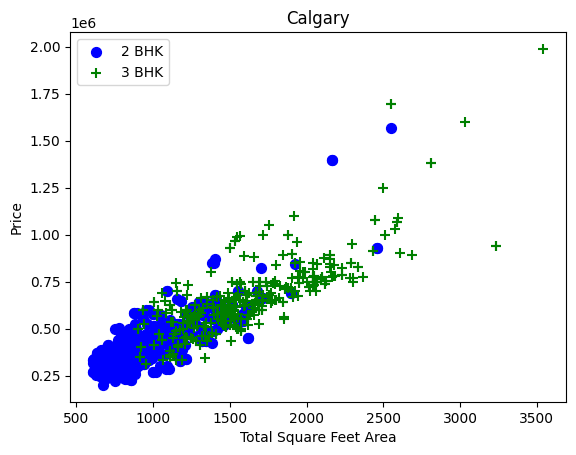

In [131]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.City==location) & (df.Bedrooms==2)]
    bhk3 = df[(df.City==location) & (df.Bedrooms==3)]
    plt.scatter(bhk2["Square Footage"],bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3["Square Footage"],bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Calgary")

In [132]:
df5[df5.Bathrooms>df5.Bedrooms+2].head()

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony,price_per_sqft
981,Anmore,BC,6800000.0,6.0,11.0,1.10,Single Family,10849.0,1,1,1,boiler,0,none,0,0,0,626.785879
1359,Burlington,ON,4728000.0,4.0,7.0,0.00,Single Family,8072.0,1,0,1,forced air,0,municipal,0,0,0,585.728444
1370,Burlington,ON,6850000.0,5.0,8.0,0.00,Single Family,7712.0,1,0,1,forced air,0,municipal,0,0,0,888.226141
1382,Burlington,ON,5999888.0,4.0,7.0,0.00,Single Family,7564.0,1,0,1,forced air,0,septic,0,0,0,793.216288
3276,Calgary,AB,739000.0,1.0,5.0,0.07,Duplex,2255.0,1,0,1,forced air,0,none,0,0,1,327.716186


In [133]:
df6 = df5[df5.Bathrooms<df5.Bedrooms+2]
df6.shape

(30101, 18)

In [134]:
df7 = df6.drop("price_per_sqft", axis=1)
df7.head(3)

,City,Province,Price,Bedrooms,Bathrooms,Acreage,Property Type,Square Footage,Garage,Parking,Fireplace,Heating,Waterfront,Sewer,Pool,Garden,Balcony
0,Abbotsford,BC,539900.0,2.0,2.0,0.0,Townhome,1345.0,0,1,1,radiant,0,none,0,0,0
1,Abbotsford,BC,1349900.0,4.0,4.0,0.0,Single Family,3182.0,1,0,1,forced air,0,none,0,0,0
2,Abbotsford,BC,769900.0,3.0,3.0,0.0,Townhome,1422.0,1,0,0,forced air,0,none,0,0,0


In [139]:
target = "Price"
X = df7.drop(columns=[target])
y = df7[target].values

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['Bedrooms', 'Bathrooms', 'Acreage', 'Square Footage', 'Garage', 'Parking', 'Fireplace', 'Waterfront', 'Pool', 'Garden', 'Balcony']
Categorical: ['City', 'Province', 'Property Type', 'Heating', 'Sewer']


In [142]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

In [140]:
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(sparse_output=False))
])

num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

preprocess = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("cats", cat_pipeline, cat_cols),
        ("nums", num_pipeline, num_cols)
    ]))
])

processed_data = preprocess.fit_transform(X)
processed_data.shape

(30101, 314)

In [141]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_metrics(model, X, y, cv):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv))
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=cv)
    r2 = cross_val_score(model, X, y, scoring="r2", cv=cv)
    return pd.DataFrame({"RMSE": rmse, "MAE": mae, "R2": r2}).agg(["mean","std"]).T

dt_pipe = Pipeline([("preprocess", preprocess), ("model", DecisionTreeRegressor(random_state=42))])
rf_pipe = Pipeline([("preprocess", preprocess), ("model", RandomForestRegressor(random_state=42, n_estimators=300, n_jobs=-1))])

dt_scores = cv_metrics(dt_pipe, X, y, kfold)
rf_scores = cv_metrics(rf_pipe, X, y, kfold)

pd.concat({"DecisionTree": dt_scores, "RandomForest": rf_scores}, axis=1)

DecisionTree                 RandomForest              
               mean           std           mean           std
RMSE  430290.765718  14814.952780  326288.466028  18377.886451
MAE   201081.596203   4108.473051  157717.627222   2815.473158
R2         0.812394      0.015612       0.892321      0.008456

In [ ]:
base_pipe = Pipeline([("preprocess", preprocess), ("model", RandomForestRegressor(random_state=42, n_jobs=-1))])

param_distributions = {
    "model__n_estimators": randint(150, 500),
    "model__max_depth": randint(3, 20),
    "model__min_samples_split": randint(2, 10),
    "model__min_samples_leaf": randint(1, 5),
    "model__max_features": uniform(0.4, 0.6)  # fraction of features
}

rnd_search = RandomizedSearchCV(
    base_pipe,
    param_distributions=param_distributions,
    n_iter=24,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rnd_search.fit(X, y)
print("Randomized best params:", rnd_search.best_params_)
print("Randomized best RMSE:", np.sqrt(-rnd_search.best_score_))

best_params = rnd_search.best_params_
n_est = max(100, int(best_params["model__n_estimators"]))

grid_params = {
    "model__n_estimators": [n_est-100, n_est, n_est+100],
    "model__max_depth": [max(2, best_params["model__max_depth"]-2), best_params["model__max_depth"], best_params["model__max_depth"]+2],
    "model__min_samples_split": [max(2, best_params["model__min_samples_split"]-1), best_params["model__min_samples_split"], best_params["model__min_samples_split"]+1],
    "model__min_samples_leaf": [max(1, best_params["model__min_samples_leaf"]-1), best_params["model__min_samples_leaf"], best_params["model__min_samples_leaf"]+1],
}

grid_search = GridSearchCV(rnd_search.best_estimator_, grid_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X, y)
print("Grid best params:", grid_search.best_params_)
print("Grid best RMSE:", np.sqrt(-grid_search.best_score_))

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
